In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/ML Project - KNN Loan Applicant Credit Risk Analysis.csv')


In [3]:
null_counts = df.isnull().sum()
print(null_counts)

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64


In [4]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [5]:
df.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [6]:
df['Z_score'] = (df['Total bounces past12months'] - df['Total bounces past12months'].mean())/df['Total bounces past12months'].std()

In [7]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score
0,40.50,2,6,0.842666,594,0,0,-0.494202
1,41.25,5,2,0.791667,754,0,0,-0.494202
2,39.50,5,2,0.727273,779,0,0,-0.494202
3,35.00,1,4,0.820232,818,0,0,-0.494202
4,34.00,3,3,0.455581,853,0,1,-0.069176


In [8]:
df[(df['Z_score'] > 3) | (df['Z_score'] < -3)]

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score
37,48.50,3,5,0.792857,712,6,9,3.331031
47,31.33,1,5,1.234265,788,0,10,3.756056
49,28.75,2,3,1.270233,709,0,10,3.756056
55,47.67,1,6,1.106494,788,1,9,3.331031
193,33.58,1,5,0.424541,762,3,12,4.606108
...,...,...,...,...,...,...,...,...
8740,37.70,1,3,0.999707,695,3,9,3.331031
8913,31.00,3,3,0.849393,785,1,10,3.756056
8920,62.25,1,4,0.400000,775,1,11,4.181082
8940,25.58,3,3,0.468615,720,2,10,3.756056


In [9]:
df.shape

(8995, 8)

In [10]:
filtered_data = df[(df['Z_score'] < 3) & (df['Z_score'] > -3)]

In [11]:
filtered_data.shape

(8716, 8)

In [12]:
filtered_data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score
count,8716.000000,8716.000000,8716.000000,8716.000000,8716.000000,8716.000000,8716.000000,8716.000000
mean,38.830285,2.134351,4.290500,0.829505,752.776962,0.237265,0.872189,-0.123499
std,10.206380,0.892608,1.269188,0.485033,67.909180,0.642476,1.718904,0.730579
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000,-0.494202
25%,30.830000,1.000000,3.000000,0.660734,730.000000,0.000000,0.000000,-0.494202
50%,37.250000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000,-0.494202
75%,45.330000,3.000000,5.000000,0.928004,797.000000,0.000000,1.000000,-0.069176
max,83.800000,5.000000,6.000000,12.006623,882.000000,8.000000,8.000000,2.906005


In [13]:
filtered_data['z_score'] = (filtered_data['Overdrafts past12months'] - filtered_data['Overdrafts past12months'].mean())/filtered_data['Overdrafts past12months'].std()

<ipython-input-13-1f7648942fce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['z_score'] = (filtered_data['Overdrafts past12months'] - filtered_data['Overdrafts past12months'].mean())/filtered_data['Overdrafts past12months'].std()


In [15]:
filtered_data[(filtered_data['z_score'] > 3) | (filtered_data['z_score'] < -3)]

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score,z_score
61,31.10,1,6,0.871590,769,3,4,1.205901,4.300138
80,30.83,3,5,0.709298,800,3,3,0.780876,4.300138
209,45.60,2,6,0.950000,804,4,8,2.906005,5.856617
224,37.00,1,4,0.798224,842,4,7,2.480979,5.856617
785,33.25,2,4,0.750000,779,5,4,1.205901,7.413096
...,...,...,...,...,...,...,...,...,...
8575,34.83,3,4,0.626030,580,3,6,2.055953,4.300138
8743,56.00,1,4,0.708861,744,4,7,2.480979,5.856617
8929,31.42,3,3,0.952703,795,3,6,2.055953,4.300138
8939,26.90,3,3,0.757427,795,3,5,1.630927,4.300138


In [18]:
filtered_data = filtered_data.drop(columns=['Z_score'])


In [19]:
print(filtered_data)

        Age  Total Work Experience  Number of years in city  \
0     40.50                      2                        6   
1     41.25                      5                        2   
2     39.50                      5                        2   
3     35.00                      1                        4   
4     34.00                      3                        3   
...     ...                    ...                      ...   
8990  30.80                      3                        3   
8991  31.83                      3                        6   
8992  32.67                      2                        5   
8993  37.00                      3                        3   
8994  32.08                      1                        6   

      Cost to Request Ratio  Cibil score  Overdrafts past12months  \
0                  0.842666          594                        0   
1                  0.791667          754                        0   
2                  0.727273         

In [20]:
filtered_data[(filtered_data['z_score'] > 3) | (filtered_data['z_score'] < -3)]

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,z_score
61,31.10,1,6,0.871590,769,3,4,4.300138
80,30.83,3,5,0.709298,800,3,3,4.300138
209,45.60,2,6,0.950000,804,4,8,5.856617
224,37.00,1,4,0.798224,842,4,7,5.856617
785,33.25,2,4,0.750000,779,5,4,7.413096
...,...,...,...,...,...,...,...,...
8575,34.83,3,4,0.626030,580,3,6,4.300138
8743,56.00,1,4,0.708861,744,4,7,5.856617
8929,31.42,3,3,0.952703,795,3,6,4.300138
8939,26.90,3,3,0.757427,795,3,5,4.300138


In [22]:
filt_data = filtered_data[(filtered_data['z_score'] < 3) & (filtered_data['z_score'] > -3)]

In [23]:
filt_data.shape

(8582, 8)

In [24]:
filt_data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,z_score
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,38.850041,2.135050,4.292356,0.828904,752.631671,0.179212,0.795269,-0.090357
std,10.222008,0.892319,1.269228,0.487282,68.115840,0.419817,1.600434,0.653437
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000,-0.369298
25%,30.830000,1.000000,3.000000,0.659840,730.000000,0.000000,0.000000,-0.369298
50%,37.250000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000,-0.369298
75%,45.420000,3.000000,5.000000,0.926461,797.000000,0.000000,1.000000,-0.369298
max,83.800000,5.000000,6.000000,12.006623,882.000000,2.000000,8.000000,2.743660


In [26]:
filt_data = filt_data.drop(columns=['z_score'])

In [27]:
filt_data['Z_score'] = (filt_data['Total bounces past12months'] -filt_data['Total bounces past12months'].mean())/filt_data['Total bounces past12months'].std()

In [29]:
filt_data[(filt_data['Z_score'] > 3) | (filt_data['Z_score'] < -3)]

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score
43,65.58,1,6,0.594013,605,2,7,3.876904
77,28.10,1,2,0.901097,748,2,8,4.501735
95,32.12,2,5,0.696672,787,2,6,3.252074
109,30.75,2,3,0.610220,624,1,6,3.252074
160,51.08,3,3,0.676478,746,1,8,4.501735
...,...,...,...,...,...,...,...,...
8927,57.33,2,3,1.000000,807,1,8,4.501735
8930,23.50,2,3,0.711300,819,0,7,3.876904
8931,60.75,3,4,0.768339,834,1,7,3.876904
8946,43.42,1,3,0.660775,787,1,7,3.876904


In [31]:
filt_data_1 = filt_data[(filt_data['Z_score'] < 3) & (filt_data['Z_score'] > -3)]

In [32]:
filt_data_1

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score
0,40.50,2,6,0.842666,594,0,0,-0.496908
1,41.25,5,2,0.791667,754,0,0,-0.496908
2,39.50,5,2,0.727273,779,0,0,-0.496908
3,35.00,1,4,0.820232,818,0,0,-0.496908
4,34.00,3,3,0.455581,853,0,1,0.127922
...,...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0,-0.496908
8991,31.83,3,6,0.986793,532,0,0,-0.496908
8992,32.67,2,5,0.628330,590,0,0,-0.496908
8993,37.00,3,3,0.797193,812,0,0,-0.496908


In [33]:
filt_data_1.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months,Z_score
count,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,38.887050,2.141513,4.294125,0.828900,752.612860,0.149958,0.579443,-0.134855
std,10.205642,0.891901,1.270627,0.493721,68.549447,0.379017,1.124916,0.702882
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000,-0.496908
25%,30.920000,1.000000,3.000000,0.657642,730.000000,0.000000,0.000000,-0.496908
50%,37.300000,2.000000,4.000000,0.800000,769.000000,0.000000,0.000000,-0.496908
75%,45.420000,3.000000,5.000000,0.925270,798.000000,0.000000,1.000000,0.127922
max,83.800000,5.000000,6.000000,12.006623,882.000000,2.000000,5.000000,2.627244


In [37]:
filt_data_1 = filt_data_1.drop(columns=['Z_score'])

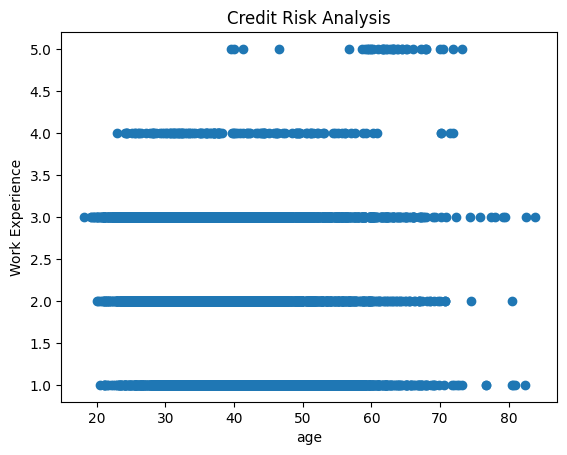

In [34]:
plt.scatter(filt_data_1['Age'] , filt_data_1['Total Work Experience']);
plt.title('Credit Risk Analysis')
plt.xlabel('age')
plt.ylabel('Work Experience')
plt.show()

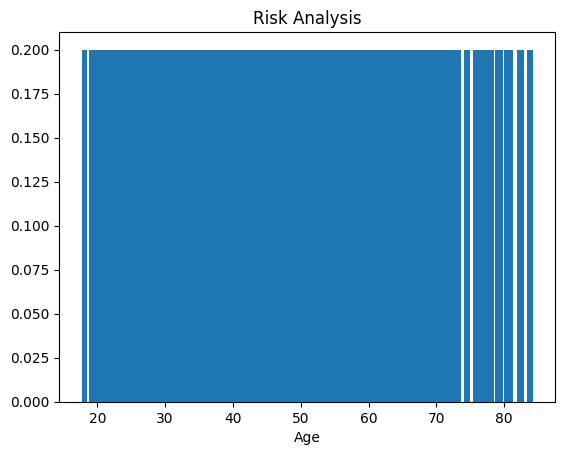

In [35]:
plt.bar(filt_data_1['Age'] , height = 0.2);
plt.title('Risk Analysis')
plt.xlabel('Age')
plt.show()

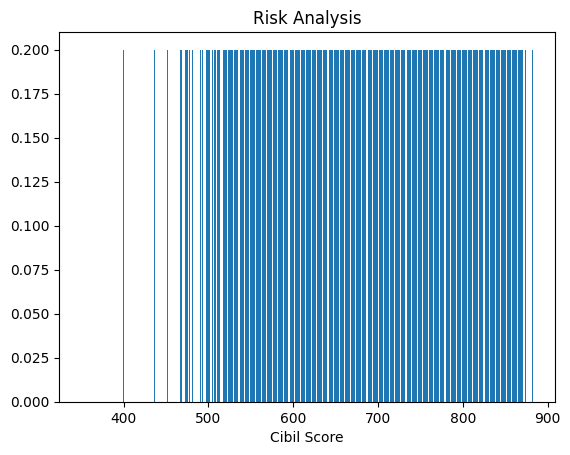

In [36]:
plt.bar(filt_data_1['Cibil score'] , height = 0.2);
plt.title('Risk Analysis')
plt.xlabel('Cibil Score')
plt.show()

In [39]:
X = filt_data_1.iloc[: , :-1].values
y = filt_data_1.iloc[: , -1].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1165    6    2    0    0    0]
 [ 248    5    0    0    0    0]
 [ 106    2    0    0    0    0]
 [  57    2    0    0    0    0]
 [  31    1    0    0    0    0]
 [  33    0    0    0    0    0]]


In [68]:
accuracy_score(y_test, y_pred)

0.7056694813027744